# Task for Graduate Rotational Internship Program(GRIP) by The Sparks Foundation
# Batch - GRIPFEBRUARY24
# Domain - Data Science & Business Analytices
# Task 4 - Exploratory Data Analysis - Terrorism
# Name - Nure Jannat

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("globalterrorism.csv", encoding='iso-8859-1')

C:\Users\janna\AppData\Local\Temp\ipykernel_14932\699147484.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorism.csv", encoding='iso-8859-1')


In [8]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df.shape

(181691, 135)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [12]:
df = df[['iyear','imonth','iday','country_txt','region_txt','city','latitude','longitude','success','attacktype1_txt',
         'targtype1_txt','weaptype1_txt','nkill','nwound']]

In [14]:
df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'city':'City',
                   'latitude':'Latitude', 'longitude':'Longitude', 'success':'Success', 'attacktype1_txt':'Attack_Type', 
                   'targtype1_txt':'Target_Type', 'weaptype1_txt':'Weapon_Type', 'nkill':'Killed', 'nwound':'Injuries'}, inplace=True)

In [18]:
df['Casualities'] = df.Killed + df.Injuries

In [19]:
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,Attack_Type,Target_Type,Weapon_Type,Killed,Injuries,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   Success      181691 non-null  int64  
 9   Attack_Type  181691 non-null  object 
 10  Target_Type  181691 non-null  object 
 11  Weapon_Type  181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Injuries     165380 non-null  float64
 14  Casualities  164817 non-null  float64
dtypes: float64(5), int64(4), object(6)
memory usage: 20.8+ MB


In [17]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
Latitude        4556
Longitude       4557
Success            0
Attack_Type        0
Target_Type        0
Weapon_Type        0
Killed         10313
Injuries       16311
dtype: int64

In [21]:
df.select_dtypes(include='number')

,Year,Month,Day,Latitude,Longitude,Success,Killed,Injuries,Casualities
0,1970,7,2,18.456792,-69.951164,1,1.0,0.0,1.0
1,1970,0,0,19.371887,-99.086624,1,0.0,0.0,0.0
2,1970,1,0,15.478598,120.599741,1,1.0,0.0,1.0
3,1970,1,0,37.997490,23.762728,1,NaN,NaN,NaN
4,1970,1,0,33.580412,130.396361,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,2.359673,45.385034,1,1.0,2.0,3.0
181687,2017,12,31,35.407278,35.942679,1,2.0,7.0,9.0
181688,2017,12,31,6.900742,124.437908,1,0.0,0.0,0.0
181689,2017,12,31,24.798346,93.940430,0,0.0,0.0,0.0


In [22]:
df.select_dtypes(include='object')

,Country,Region,City,Attack_Type,Target_Type,Weapon_Type
0,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown
1,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown
2,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown
3,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives
4,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...
181686,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Firearms
181687,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Explosives
181688,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary
181689,India,South Asia,Imphal,Bombing/Explosion,Government (General),Explosives


In [23]:
null=df.isnull().sum()/df.shape[0]
null

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
Region         0.000000
City           0.002389
Latitude       0.025076
Longitude      0.025081
Success        0.000000
Attack_Type    0.000000
Target_Type    0.000000
Weapon_Type    0.000000
Killed         0.056761
Injuries       0.089773
Casualities    0.092872
dtype: float64

In [24]:
df.dropna(axis=0, inplace=True)

In [25]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
Latitude       0
Longitude      0
Success        0
Attack_Type    0
Target_Type    0
Weapon_Type    0
Killed         0
Injuries       0
Casualities    0
dtype: int64

In [29]:
df.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,Attack_Type,Target_Type,Weapon_Type,Killed,Injuries,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,1.0
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,1,Armed Assault,Police,Firearms,0.0,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Firearms,0.0,0.0,0.0


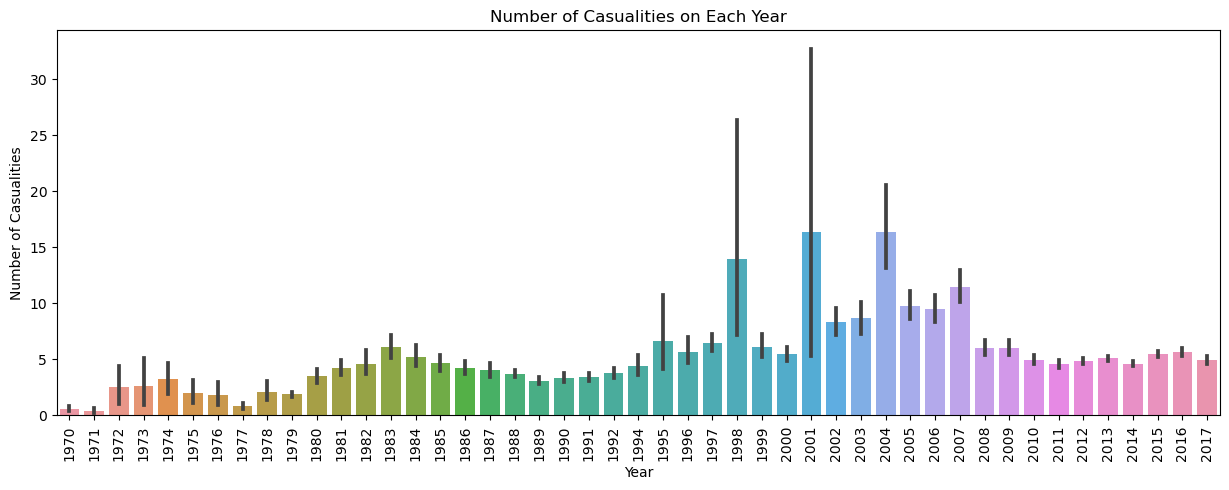

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='Casualities',data=df)
plt.title('Number of Casualities on Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Casualities')
plt.xticks(rotation=90)
plt.show()

In 2001, most people are killed and injured by the terrorist attack.

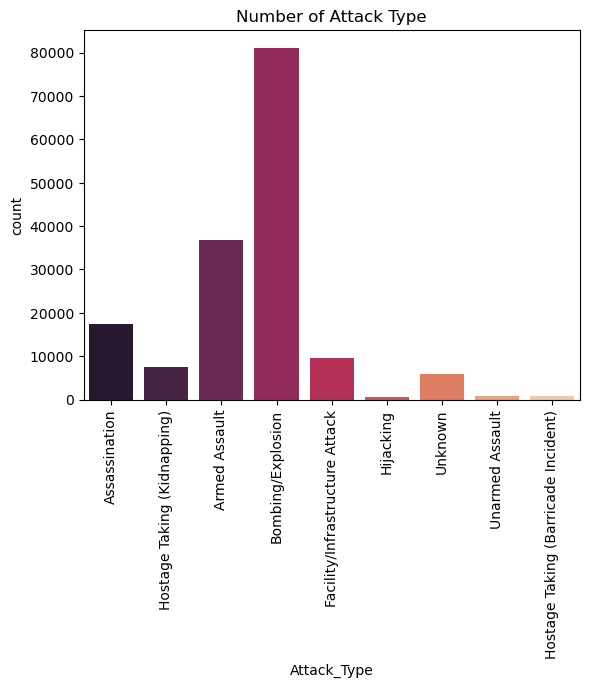

In [35]:
sns.countplot(data=df, x='Attack_Type', palette='rocket')
plt.title("Number of Attack Type")
plt.xticks(rotation=90)
plt.show()

Bombing and Explosion are used most of the time by terrorists

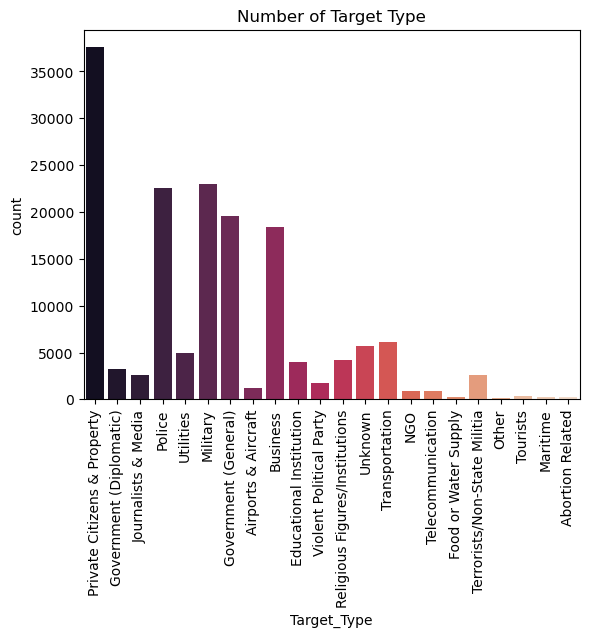

In [36]:
sns.countplot(data=df, x='Target_Type', palette='rocket')
plt.title("Number of Target Type")
plt.xticks(rotation=90)
plt.show()

Terrorists attaked the private citizens & their property most of the time.

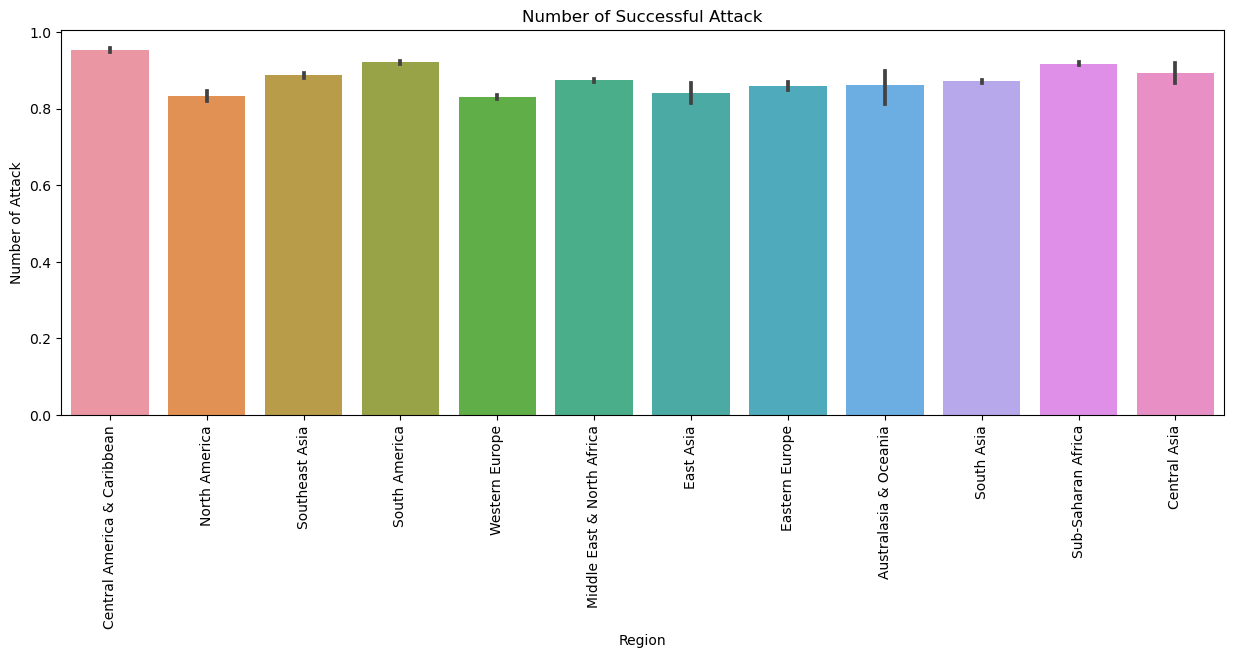

In [41]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region', y='Success',data=df)
plt.title('Number of Successful Attack')
plt.xlabel('Region')
plt.ylabel('Number of Attack')
plt.xticks(rotation=90)
plt.show()

Central America and Caribbean region was the first choice for attack

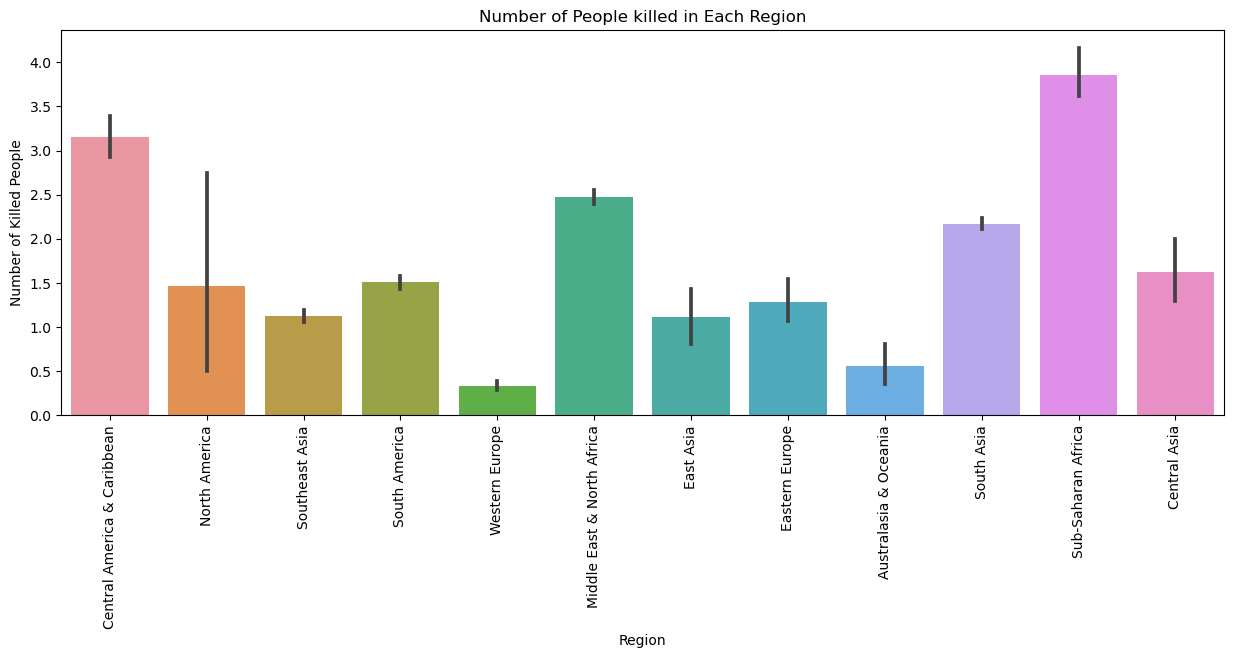

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region', y='Killed',data=df)
plt.title('Number of People killed in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Killed People')
plt.xticks(rotation=90)
plt.show()

The highest number of people were killed for attack in Sub-Saharan African 

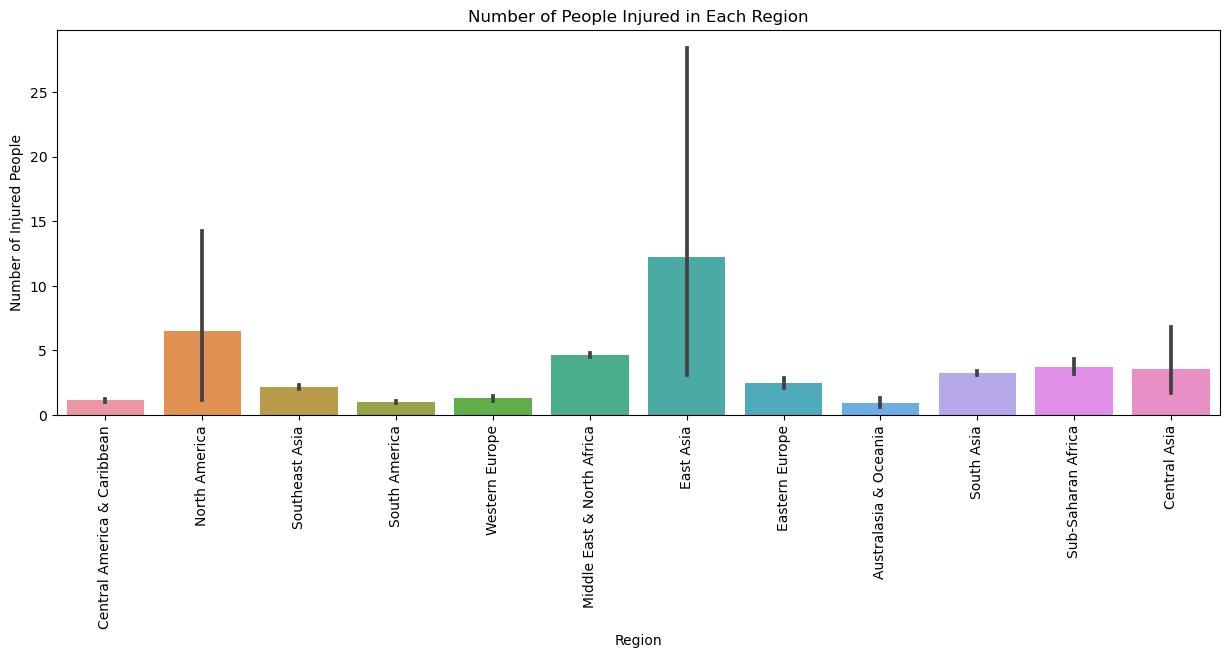

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x='Region', y='Injuries',data=df)
plt.title('Number of People Injured in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Injured People')
plt.xticks(rotation=90)
plt.show()

People are mosty injured for attack in East Asia.

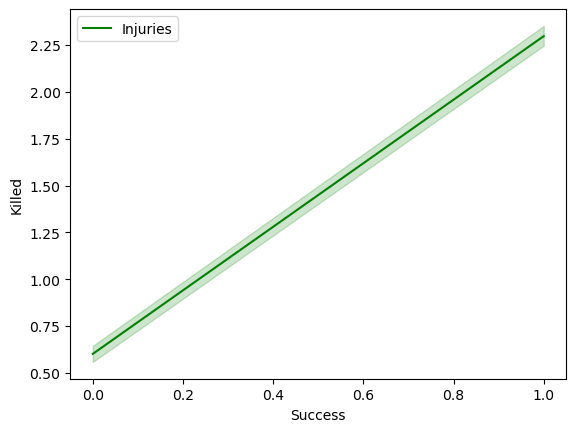

In [42]:
sns.lineplot(x='Success', y='Killed', data=df, color='g', label='Injuries')
plt.legend()

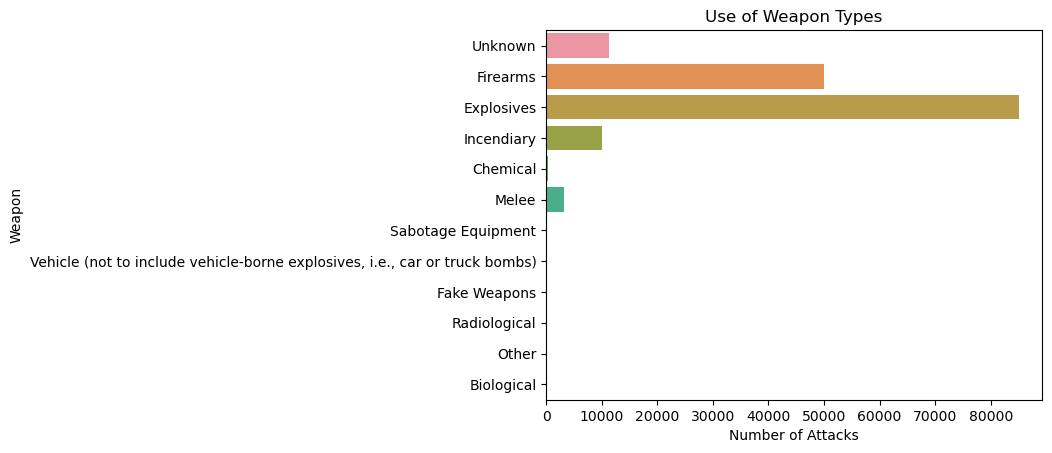

In [47]:
sns.countplot(y=df['Weapon_Type'])
plt.title('Use of Weapon Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon')
plt.show()

Explosives are used most of the time for attacking.

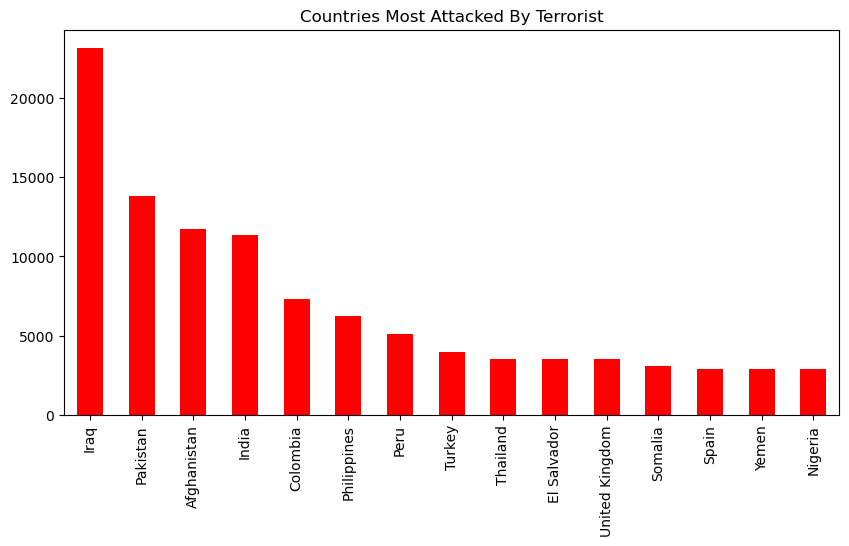

In [57]:
plt.figure(figsize=(10,5))
v=df['Country'].value_counts().head(15)
v.plot(kind='bar', color = 'r')
plt.title('Countries Most Attacked By Terrorist')
plt.xticks(rotation=90)
plt.show()

Top 15 countries mostly attacked by terrorist